## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0   1.888859   816.180383  0.593703  6.559346  484.511126
1   7.697733   859.077556  0.039637  1.820176   34.842851
2  70.893134   801.364721  0.343260  7.530145  284.213235
3  49.418550   846.035670  0.418469  4.512869  357.508148
4  10.143050  1588.215196  0.549075  5.726970  872.127320


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9637516	total: 58.4ms	remaining: 58.3s
1:	learn: 0.9546577	total: 60.5ms	remaining: 30.2s
2:	learn: 0.9459961	total: 61.7ms	remaining: 20.5s
3:	learn: 0.9364125	total: 62.9ms	remaining: 15.7s
4:	learn: 0.9234208	total: 64.1ms	remaining: 12.8s
5:	learn: 0.9120067	total: 65.2ms	remaining: 10.8s
6:	learn: 0.9008990	total: 66.3ms	remaining: 9.41s
7:	learn: 0.8898643	total: 67.3ms	remaining: 8.35s
8:	learn: 0.8810230	total: 68.6ms	remaining: 7.55s
9:	learn: 0.8703600	total: 69.5ms	remaining: 6.88s
10:	learn: 0.8611855	total: 70.7ms	remaining: 6.36s
11:	learn: 0.8497879	total: 71.5ms	remaining: 5.89s
12:	learn: 0.8383684	total: 72.4ms	remaining: 5.49s
13:	learn: 0.8284821	total: 73.1ms	remaining: 5.15s
14:	learn: 0.8196912	total: 73.9ms	remaining: 4.85s
15:	learn: 0.8116310	total: 74.7ms	remaining: 4.59s
16:	learn: 0.8008051	total: 75.2ms	remaining: 4.35s
17:	learn: 0.7934586	total: 76.3ms	remaining: 4.16s
18:	learn: 0.7871483	total: 79.2ms	remaining

59:	learn: 0.4898554	total: 104ms	remaining: 1.63s
60:	learn: 0.4843254	total: 105ms	remaining: 1.61s
61:	learn: 0.4795490	total: 106ms	remaining: 1.61s
62:	learn: 0.4745596	total: 107ms	remaining: 1.59s
63:	learn: 0.4687299	total: 108ms	remaining: 1.57s
64:	learn: 0.4651233	total: 108ms	remaining: 1.55s
65:	learn: 0.4600193	total: 109ms	remaining: 1.54s
66:	learn: 0.4559047	total: 110ms	remaining: 1.53s
67:	learn: 0.4512301	total: 111ms	remaining: 1.52s
68:	learn: 0.4461267	total: 112ms	remaining: 1.51s
69:	learn: 0.4418496	total: 113ms	remaining: 1.51s
70:	learn: 0.4379214	total: 115ms	remaining: 1.5s
71:	learn: 0.4333785	total: 115ms	remaining: 1.48s
72:	learn: 0.4297553	total: 116ms	remaining: 1.47s
73:	learn: 0.4252106	total: 117ms	remaining: 1.46s
74:	learn: 0.4202754	total: 118ms	remaining: 1.46s
75:	learn: 0.4158352	total: 119ms	remaining: 1.45s
76:	learn: 0.4108384	total: 120ms	remaining: 1.44s
77:	learn: 0.4066425	total: 121ms	remaining: 1.43s
78:	learn: 0.4029484	total: 122m

172:	learn: 0.1834882	total: 177ms	remaining: 844ms
173:	learn: 0.1823013	total: 177ms	remaining: 841ms
174:	learn: 0.1809321	total: 178ms	remaining: 838ms
175:	learn: 0.1794026	total: 178ms	remaining: 834ms
176:	learn: 0.1780474	total: 179ms	remaining: 830ms
177:	learn: 0.1765941	total: 179ms	remaining: 826ms
178:	learn: 0.1756793	total: 179ms	remaining: 822ms
179:	learn: 0.1750551	total: 180ms	remaining: 818ms
180:	learn: 0.1738257	total: 180ms	remaining: 814ms
181:	learn: 0.1724845	total: 180ms	remaining: 811ms
182:	learn: 0.1716067	total: 181ms	remaining: 807ms
183:	learn: 0.1705194	total: 181ms	remaining: 803ms
184:	learn: 0.1697481	total: 181ms	remaining: 799ms
185:	learn: 0.1690216	total: 182ms	remaining: 795ms
186:	learn: 0.1677041	total: 182ms	remaining: 792ms
187:	learn: 0.1671164	total: 182ms	remaining: 788ms
188:	learn: 0.1656628	total: 183ms	remaining: 784ms
189:	learn: 0.1647723	total: 183ms	remaining: 780ms
190:	learn: 0.1642397	total: 183ms	remaining: 777ms
191:	learn: 

372:	learn: 0.0715084	total: 278ms	remaining: 467ms
373:	learn: 0.0710587	total: 279ms	remaining: 467ms
374:	learn: 0.0708962	total: 280ms	remaining: 466ms
375:	learn: 0.0704004	total: 280ms	remaining: 465ms
376:	learn: 0.0702807	total: 281ms	remaining: 465ms
377:	learn: 0.0701569	total: 282ms	remaining: 463ms
378:	learn: 0.0700010	total: 282ms	remaining: 462ms
379:	learn: 0.0695749	total: 282ms	remaining: 461ms
380:	learn: 0.0691564	total: 283ms	remaining: 459ms
381:	learn: 0.0690416	total: 283ms	remaining: 458ms
382:	learn: 0.0685117	total: 283ms	remaining: 457ms
383:	learn: 0.0680277	total: 284ms	remaining: 455ms
384:	learn: 0.0675630	total: 284ms	remaining: 454ms
385:	learn: 0.0674519	total: 285ms	remaining: 453ms
386:	learn: 0.0673419	total: 285ms	remaining: 452ms
387:	learn: 0.0668911	total: 286ms	remaining: 450ms
388:	learn: 0.0667831	total: 286ms	remaining: 449ms
389:	learn: 0.0663360	total: 286ms	remaining: 448ms
390:	learn: 0.0662300	total: 287ms	remaining: 447ms
391:	learn: 

538:	learn: 0.0366990	total: 349ms	remaining: 298ms
539:	learn: 0.0365326	total: 349ms	remaining: 297ms
540:	learn: 0.0363833	total: 350ms	remaining: 297ms
541:	learn: 0.0362157	total: 350ms	remaining: 296ms
542:	learn: 0.0361106	total: 351ms	remaining: 295ms
543:	learn: 0.0360185	total: 351ms	remaining: 294ms
544:	learn: 0.0359174	total: 352ms	remaining: 294ms
545:	learn: 0.0358629	total: 352ms	remaining: 293ms
546:	learn: 0.0357745	total: 353ms	remaining: 292ms
547:	learn: 0.0356085	total: 353ms	remaining: 291ms
548:	learn: 0.0354702	total: 354ms	remaining: 290ms
549:	learn: 0.0354095	total: 354ms	remaining: 290ms
550:	learn: 0.0353497	total: 355ms	remaining: 289ms
551:	learn: 0.0352084	total: 355ms	remaining: 288ms
552:	learn: 0.0350615	total: 355ms	remaining: 287ms
553:	learn: 0.0350028	total: 356ms	remaining: 287ms
554:	learn: 0.0348608	total: 356ms	remaining: 286ms
555:	learn: 0.0347176	total: 357ms	remaining: 285ms
556:	learn: 0.0345792	total: 357ms	remaining: 284ms
557:	learn: 

766:	learn: 0.0159151	total: 452ms	remaining: 137ms
767:	learn: 0.0158330	total: 452ms	remaining: 137ms
768:	learn: 0.0157533	total: 453ms	remaining: 136ms
769:	learn: 0.0156903	total: 453ms	remaining: 135ms
770:	learn: 0.0156247	total: 454ms	remaining: 135ms
771:	learn: 0.0155570	total: 454ms	remaining: 134ms
772:	learn: 0.0154943	total: 455ms	remaining: 134ms
773:	learn: 0.0154296	total: 455ms	remaining: 133ms
774:	learn: 0.0153697	total: 455ms	remaining: 132ms
775:	learn: 0.0152849	total: 456ms	remaining: 132ms
776:	learn: 0.0152137	total: 456ms	remaining: 131ms
777:	learn: 0.0151581	total: 456ms	remaining: 130ms
778:	learn: 0.0150758	total: 457ms	remaining: 130ms
779:	learn: 0.0149998	total: 457ms	remaining: 129ms
780:	learn: 0.0149434	total: 458ms	remaining: 128ms
781:	learn: 0.0148897	total: 458ms	remaining: 128ms
782:	learn: 0.0148230	total: 458ms	remaining: 127ms
783:	learn: 0.0147497	total: 459ms	remaining: 126ms
784:	learn: 0.0146970	total: 459ms	remaining: 126ms
785:	learn: 

941:	learn: 0.0087544	total: 529ms	remaining: 32.6ms
942:	learn: 0.0087184	total: 530ms	remaining: 32ms
943:	learn: 0.0086833	total: 530ms	remaining: 31.4ms
944:	learn: 0.0086700	total: 531ms	remaining: 30.9ms
945:	learn: 0.0086578	total: 531ms	remaining: 30.3ms
946:	learn: 0.0086140	total: 531ms	remaining: 29.7ms
947:	learn: 0.0085830	total: 532ms	remaining: 29.2ms
948:	learn: 0.0085585	total: 532ms	remaining: 28.6ms
949:	learn: 0.0085465	total: 532ms	remaining: 28ms
950:	learn: 0.0085347	total: 533ms	remaining: 27.5ms
951:	learn: 0.0085096	total: 533ms	remaining: 26.9ms
952:	learn: 0.0084679	total: 534ms	remaining: 26.3ms
953:	learn: 0.0084365	total: 534ms	remaining: 25.7ms
954:	learn: 0.0084121	total: 534ms	remaining: 25.2ms
955:	learn: 0.0083782	total: 535ms	remaining: 24.6ms
956:	learn: 0.0083666	total: 535ms	remaining: 24ms
957:	learn: 0.0083552	total: 536ms	remaining: 23.5ms
958:	learn: 0.0083440	total: 536ms	remaining: 22.9ms
959:	learn: 0.0083330	total: 537ms	remaining: 22.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


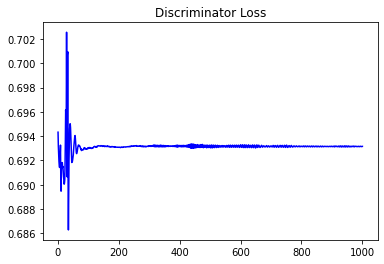

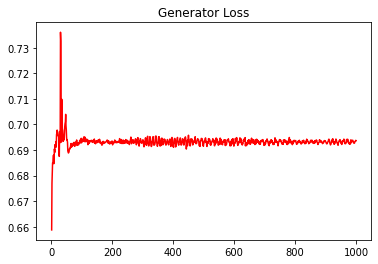

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06007060697828308


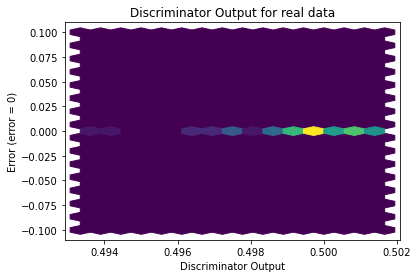

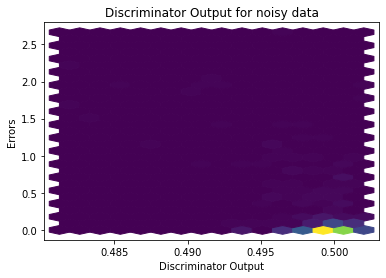

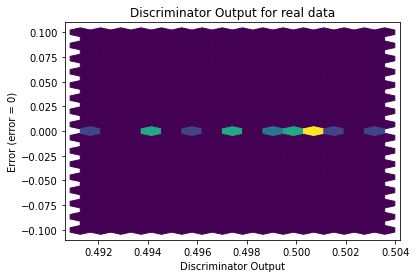

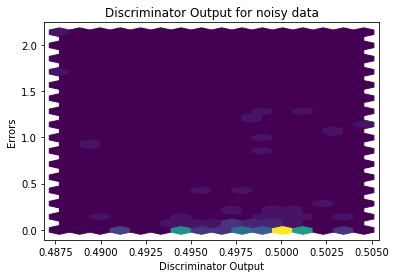

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0673]], requires_grad=True)
